In [3]:
import os
import pandas as pd
import json
import numpy as  np
import glob
import sklearn
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
#METHOD 1 : direct data as input

In [5]:
result=pd.read_csv("processed_data.csv")

In [6]:
result

,Unnamed: 0,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,...,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Origin,Dest,round_time
0,0,11,318,176,0.1,10,1023,100,47,17,...,17.0,10397,13204,101.0,51,0.0,10.0,ATL,MCO,0
1,1,18,315,122,0.0,10,1024,100,38,28,...,6.0,10397,13204,728.0,720,0.0,8.0,ATL,MCO,600
2,2,18,315,122,0.0,10,1024,100,38,28,...,37.0,10397,13930,753.0,725,1.0,28.0,ATL,ORD,600
3,3,18,317,122,0.0,10,1024,100,38,26,...,0.0,10397,13303,838.0,837,0.0,1.0,ATL,MIA,700
4,4,18,317,122,0.0,10,1024,100,38,26,...,0.0,10397,12892,922.0,915,0.0,7.0,ATL,LAX,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851431,1851431,20,303,113,0.0,10,1014,0,58,22,...,9.0,14771,13930,513.0,519,0.0,0.0,SFO,ORD,2300
1851432,1851432,20,303,113,0.0,10,1014,0,58,22,...,5.0,14771,10397,615.0,632,0.0,0.0,SFO,ATL,2300
1851433,1851433,20,303,113,0.0,10,1014,0,58,22,...,0.0,14771,12478,735.0,750,0.0,0.0,SFO,JFK,2300
1851434,1851434,20,303,113,0.0,10,1014,0,58,22,...,0.0,14771,12478,655.0,704,0.0,0.0,SFO,JFK,2300


In [7]:
result=result[result['ArrDel15']==1.0]

In [8]:
result

,Unnamed: 0,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,...,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Origin,Dest,round_time
2,2,18,315,122,0.0,10,1024,100,38,28,...,37.0,10397,13930,753.0,725,1.0,28.0,ATL,ORD,600
10,10,18,317,122,0.0,10,1024,100,38,26,...,43.0,10397,11292,914.0,858,1.0,16.0,ATL,DEN,700
41,41,17,317,122,0.0,10,1025,100,38,20,...,67.0,10397,12892,1349.0,1230,1.0,79.0,ATL,LAX,1100
58,58,17,317,122,0.0,10,1025,100,38,21,...,37.0,10397,11292,1440.0,1408,1.0,32.0,ATL,DEN,1300
59,59,17,317,122,0.0,10,1025,100,38,21,...,10.0,10397,12892,1537.0,1520,1.0,17.0,ATL,LAX,1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851396,1851396,24,292,113,0.0,10,1015,11,56,26,...,131.0,14771,14747,2025.0,1819,1.0,126.0,SFO,SEA,1600
1851397,1851397,25,293,113,0.0,10,1014,5,57,27,...,14.0,14771,14747,1901.0,1845,1.0,16.0,SFO,SEA,1700
1851399,1851399,25,293,113,0.0,10,1014,5,57,27,...,262.0,14771,11292,34.0,2031,1.0,243.0,SFO,DEN,1700
1851403,1851403,25,293,113,0.0,10,1014,5,57,27,...,67.0,14771,12889,1938.0,1850,1.0,48.0,SFO,LAS,1700


In [9]:
target=result["ArrDelayMinutes"]

In [10]:
features=result.copy()
features=features.drop(["ArrDel15","Unnamed: 0","date","airport","air","FlightDate","Origin","Dest"],axis=1)

In [11]:
features=features.drop(["ArrDelayMinutes","time","ArrTime","CRSArrTime","time","round_time"],axis=1)

In [12]:
features

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,...,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID
2,18,315,122,0.0,10,1024,100,38,28,40,...,1,2016,1,1,652.0,1.0,615,37.0,10397,13930
10,18,317,122,0.0,10,1024,100,38,26,41,...,1,2016,1,1,803.0,1.0,720,43.0,10397,11292
41,17,317,122,0.0,10,1025,100,38,20,45,...,1,2016,1,1,1137.0,1.0,1030,67.0,10397,12892
58,17,317,122,0.0,10,1025,100,38,21,47,...,1,2016,1,1,1322.0,1.0,1245,37.0,10397,11292
59,17,317,122,0.0,10,1025,100,38,21,47,...,1,2016,1,1,1325.0,0.0,1315,10.0,10397,12892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851396,24,292,113,0.0,10,1015,11,56,26,66,...,3,2017,9,30,1815.0,1.0,1604,131.0,14771,14747
1851397,25,293,113,0.0,10,1014,5,57,27,67,...,3,2017,9,30,1654.0,0.0,1640,14.0,14771,14747
1851399,25,293,113,0.0,10,1014,5,57,27,67,...,3,2017,9,30,2125.0,1.0,1703,262.0,14771,11292
1851403,25,293,113,0.0,10,1014,5,57,27,67,...,3,2017,9,30,1827.0,1.0,1720,67.0,14771,12889


In [13]:
train_feature,test_feature,train_target,test_target=train_test_split(features,target,test_size=0.2,random_state=42)

In [14]:
#linear regression
lin_reg=LinearRegression().fit(train_feature,train_target)
lin_reg_pred=lin_reg.predict(test_feature)

In [15]:
print("root_mean_squared_error:  ",mean_squared_error(test_target,lin_reg_pred)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target,lin_reg_pred))
print("r2_score:                 ",r2_score(test_target,lin_reg_pred))

root_mean_squared_error:   17.761484198472633
mean_absolute_error:       12.297523203305888
r2_score:                  0.9369461237531438


In [16]:
#linear support vector regressor
SVR=LinearSVR().fit(train_feature,train_target)
SVR_pred=SVR.predict(test_feature)

In [17]:
print("root_mean_squared_error:  ",mean_squared_error(test_target,SVR_pred)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target,SVR_pred))
print("r2_score:                 ",r2_score(test_target,SVR_pred))

root_mean_squared_error:   50.16231756734962
mean_absolute_error:       47.27913177333362
r2_score:                  0.4970689267739635


In [18]:
#Extra Tree Regressor
extra_tree=ExtraTreesRegressor(n_estimators=100, random_state=0).fit(train_feature,train_target)
extra_tree_pred=extra_tree.predict(test_feature)

In [19]:
print("root_mean_squared_error:  ",mean_squared_error(test_target,extra_tree_pred)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target,extra_tree_pred))
print("r2_score:                 ",r2_score(test_target,extra_tree_pred))

root_mean_squared_error:   17.09924076039515
mean_absolute_error:       11.975189596969539
r2_score:                  0.9415604400484108


In [20]:
#Gradient Boosting Regressor
XGBoost=GradientBoostingRegressor().fit(train_feature,train_target)
XGBoost_pred=XGBoost.predict(test_feature)

In [21]:
print("root_mean_squared_error:  ",mean_squared_error(test_target,XGBoost_pred)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target,XGBoost_pred))
print("r2_score:                 ",r2_score(test_target,XGBoost_pred))

root_mean_squared_error:   17.08134219864344
mean_absolute_error:       11.776415587799708
r2_score:                  0.9416827187679595


In [22]:
#METHOD 2 : Pipelining the classified data as input.

In [23]:
features_pip=pd.read_csv("pipeline_data.csv")

In [24]:
features_pip

,Unnamed: 0,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,...,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDelayMinutes
0,1079740,25,295,116,0.0,10,1009,33,55,27,...,2017,4,27,1207.0,1.0,1130,37.0,12892,14747,39.0
1,550997,24,278,122,0.0,10,1027,22,12,31,...,2017,1,8,1415.0,1.0,1344,31.0,11618,13204,23.0
2,639641,16,163,113,0.1,10,1012,25,74,18,...,2016,8,4,2106.0,1.0,1915,111.0,12266,13204,102.0
3,1796216,9,10,113,0.0,10,1022,70,48,14,...,2017,12,28,1734.0,1.0,1650,44.0,14771,12889,40.0
4,1002634,8,197,119,0.0,10,1013,78,68,10,...,2016,7,28,1150.0,1.0,1016,94.0,12892,11298,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95180,1768695,3,76,113,0.0,10,1015,0,52,3,...,2016,9,26,841.0,0.0,845,0.0,14771,11292,0.0
95181,402881,22,188,113,0.0,10,1006,0,49,26,...,2016,3,14,1527.0,1.0,1450,37.0,11298,13930,27.0
95182,730024,9,196,113,0.0,10,1017,0,65,10,...,2016,8,5,1117.0,1.0,959,78.0,12478,14107,42.0
95183,989158,9,167,113,0.0,10,1012,20,57,10,...,2016,6,14,22.0,1.0,2240,102.0,12892,11057,86.0


In [25]:
target_pip=features_pip["ArrDelayMinutes"]

In [26]:
features_pip=features_pip.drop(["ArrDelayMinutes","Unnamed: 0"],axis=1)

In [27]:
features_pip

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,...,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID
0,25,295,116,0.0,10,1009,33,55,27,69,...,2,2017,4,27,1207.0,1.0,1130,37.0,12892,14747
1,24,278,122,0.0,10,1027,22,12,31,22,...,1,2017,1,8,1415.0,1.0,1344,31.0,11618,13204
2,16,163,113,0.1,10,1012,25,74,18,92,...,3,2016,8,4,2106.0,1.0,1915,111.0,12266,13204
3,9,10,113,0.0,10,1022,70,48,14,51,...,4,2017,12,28,1734.0,1.0,1650,44.0,14771,12889
4,8,197,119,0.0,10,1013,78,68,10,76,...,3,2016,7,28,1150.0,1.0,1016,94.0,12892,11298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95180,3,76,113,0.0,10,1015,0,52,3,68,...,3,2016,9,26,841.0,0.0,845,0.0,14771,11292
95181,22,188,113,0.0,10,1006,0,49,26,84,...,1,2016,3,14,1527.0,1.0,1450,37.0,11298,13930
95182,9,196,113,0.0,10,1017,0,65,10,76,...,3,2016,8,5,1117.0,1.0,959,78.0,12478,14107
95183,9,167,113,0.0,10,1012,20,57,10,62,...,2,2016,6,14,22.0,1.0,2240,102.0,12892,11057


In [28]:
train_feature_pip,test_feature_pip,train_target_pip,test_target_pip=train_test_split(features_pip,target_pip,test_size=0.2,random_state=42)

In [29]:
#linear regression
lin_reg_pip=LinearRegression().fit(train_feature_pip,train_target_pip)
lin_reg_pred_pip=lin_reg_pip.predict(test_feature_pip)

In [30]:
print("root_mean_squared_error:  ",mean_squared_error(test_target_pip,lin_reg_pred_pip)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target_pip,lin_reg_pred_pip))
print("r2_score:                 ",r2_score(test_target_pip,lin_reg_pred_pip))

root_mean_squared_error:   17.871572305815853
mean_absolute_error:       12.622196285798008
r2_score:                  0.9418552137783318


In [31]:
#linear support vector regressor
SVR_pip=LinearSVR().fit(train_feature_pip,train_target_pip)
SVR_pred_pip=SVR_pip.predict(test_feature_pip)

In [32]:
print("root_mean_squared_error:  ",mean_squared_error(test_target_pip,SVR_pred_pip)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target_pip,SVR_pred_pip))
print("r2_score:                 ",r2_score(test_target_pip,SVR_pred_pip))

root_mean_squared_error:   30.51369561825536
mean_absolute_error:       27.400809375917976
r2_score:                  0.8304979822423763


In [33]:
#Extra Tree Regressor
extra_tree_pip=ExtraTreesRegressor(n_estimators=100, random_state=0).fit(train_feature_pip,train_target_pip)
extra_tree_pred_pip=extra_tree_pip.predict(test_feature_pip)

In [34]:
print("root_mean_squared_error:  ",mean_squared_error(test_target_pip,extra_tree_pred_pip)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target_pip,extra_tree_pred_pip))
print("r2_score:                 ",r2_score(test_target_pip,extra_tree_pred_pip))

root_mean_squared_error:   18.085150539997386
mean_absolute_error:       12.91981746073436
r2_score:                  0.9404571649267806


In [35]:
#Gradient Boosting Regressor
XGBoost_pip=GradientBoostingRegressor().fit(train_feature_pip,train_target_pip)
XGBoost_pred_pip=XGBoost_pip.predict(test_feature_pip)

In [36]:
print("root_mean_squared_error:  ",mean_squared_error(test_target_pip,XGBoost_pred_pip)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target_pip,XGBoost_pred_pip))
print("r2_score:                 ",r2_score(test_target_pip,XGBoost_pred_pip))

root_mean_squared_error:   17.75758454278301
mean_absolute_error:       12.500865930232601
r2_score:                  0.9425945619936841


In [37]:
#REGRESSION ANALYSIS

In [38]:
reg_analysis_data=pd.read_csv("processed_data.csv")

In [39]:
reg_analysis_data=reg_analysis_data.drop(["date","airport","air","FlightDate","Origin","Dest"],axis=1)

In [40]:
reg_analysis_data=reg_analysis_data.drop(["Unnamed: 0","time","ArrTime","CRSArrTime","time","round_time"],axis=1)

In [41]:
reg_analysis_data= reg_analysis_data[reg_analysis_data['ArrDel15']==1.0]

In [42]:
reg_analysis_data

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,...,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDel15,ArrDelayMinutes
2,18,315,122,0.0,10,1024,100,38,28,40,...,1,1,652.0,1.0,615,37.0,10397,13930,1.0,28.0
10,18,317,122,0.0,10,1024,100,38,26,41,...,1,1,803.0,1.0,720,43.0,10397,11292,1.0,16.0
41,17,317,122,0.0,10,1025,100,38,20,45,...,1,1,1137.0,1.0,1030,67.0,10397,12892,1.0,79.0
58,17,317,122,0.0,10,1025,100,38,21,47,...,1,1,1322.0,1.0,1245,37.0,10397,11292,1.0,32.0
59,17,317,122,0.0,10,1025,100,38,21,47,...,1,1,1325.0,0.0,1315,10.0,10397,12892,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851396,24,292,113,0.0,10,1015,11,56,26,66,...,9,30,1815.0,1.0,1604,131.0,14771,14747,1.0,126.0
1851397,25,293,113,0.0,10,1014,5,57,27,67,...,9,30,1654.0,0.0,1640,14.0,14771,14747,1.0,16.0
1851399,25,293,113,0.0,10,1014,5,57,27,67,...,9,30,2125.0,1.0,1703,262.0,14771,11292,1.0,243.0
1851403,25,293,113,0.0,10,1014,5,57,27,67,...,9,30,1827.0,1.0,1720,67.0,14771,12889,1.0,48.0


In [43]:
reg_analysis_data=reg_analysis_data.drop("ArrDel15",axis=1)

In [44]:
reg_analysis_data

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,...,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDelayMinutes
2,18,315,122,0.0,10,1024,100,38,28,40,...,2016,1,1,652.0,1.0,615,37.0,10397,13930,28.0
10,18,317,122,0.0,10,1024,100,38,26,41,...,2016,1,1,803.0,1.0,720,43.0,10397,11292,16.0
41,17,317,122,0.0,10,1025,100,38,20,45,...,2016,1,1,1137.0,1.0,1030,67.0,10397,12892,79.0
58,17,317,122,0.0,10,1025,100,38,21,47,...,2016,1,1,1322.0,1.0,1245,37.0,10397,11292,32.0
59,17,317,122,0.0,10,1025,100,38,21,47,...,2016,1,1,1325.0,0.0,1315,10.0,10397,12892,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851396,24,292,113,0.0,10,1015,11,56,26,66,...,2017,9,30,1815.0,1.0,1604,131.0,14771,14747,126.0
1851397,25,293,113,0.0,10,1014,5,57,27,67,...,2017,9,30,1654.0,0.0,1640,14.0,14771,14747,16.0
1851399,25,293,113,0.0,10,1014,5,57,27,67,...,2017,9,30,2125.0,1.0,1703,262.0,14771,11292,243.0
1851403,25,293,113,0.0,10,1014,5,57,27,67,...,2017,9,30,1827.0,1.0,1720,67.0,14771,12889,48.0


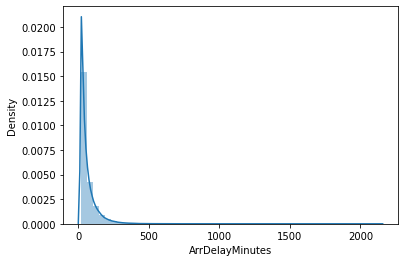

In [45]:
sns.distplot(reg_analysis_data["ArrDelayMinutes"])
plt.savefig("distrib.png")

In [46]:
reg_analysis_data["ArrDelayMinutes"].min()

15.0

In [47]:
df1=reg_analysis_data[(reg_analysis_data["ArrDelayMinutes"]>0.0) & (reg_analysis_data["ArrDelayMinutes"]<=300.0)]
df2=reg_analysis_data[(reg_analysis_data["ArrDelayMinutes"]>300) & (reg_analysis_data["ArrDelayMinutes"]<=600.0)]
df3=reg_analysis_data[(reg_analysis_data["ArrDelayMinutes"]>600.0) & (reg_analysis_data["ArrDelayMinutes"]<=1000.0)]
df4=reg_analysis_data[(reg_analysis_data["ArrDelayMinutes"]>1000.0) & (reg_analysis_data["ArrDelayMinutes"]<=1500.0)]
df5=reg_analysis_data[(reg_analysis_data["ArrDelayMinutes"]>1500.0)]

In [48]:
len(df5)

11

In [49]:
df1

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,...,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrDelayMinutes
2,18,315,122,0.0,10,1024,100,38,28,40,...,2016,1,1,652.0,1.0,615,37.0,10397,13930,28.0
10,18,317,122,0.0,10,1024,100,38,26,41,...,2016,1,1,803.0,1.0,720,43.0,10397,11292,16.0
41,17,317,122,0.0,10,1025,100,38,20,45,...,2016,1,1,1137.0,1.0,1030,67.0,10397,12892,79.0
58,17,317,122,0.0,10,1025,100,38,21,47,...,2016,1,1,1322.0,1.0,1245,37.0,10397,11292,32.0
59,17,317,122,0.0,10,1025,100,38,21,47,...,2016,1,1,1325.0,0.0,1315,10.0,10397,12892,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851396,24,292,113,0.0,10,1015,11,56,26,66,...,2017,9,30,1815.0,1.0,1604,131.0,14771,14747,126.0
1851397,25,293,113,0.0,10,1014,5,57,27,67,...,2017,9,30,1654.0,0.0,1640,14.0,14771,14747,16.0
1851399,25,293,113,0.0,10,1014,5,57,27,67,...,2017,9,30,2125.0,1.0,1703,262.0,14771,11292,243.0
1851403,25,293,113,0.0,10,1014,5,57,27,67,...,2017,9,30,1827.0,1.0,1720,67.0,14771,12889,48.0


In [50]:
target1=df1["ArrDelayMinutes"]
features1=df1.drop("ArrDelayMinutes",axis=1)

In [51]:
train_feature1,test_feature1,train_target1,test_target1=train_test_split(features1,target1,test_size=0.2,random_state=42)

In [52]:
XGBoost1=GradientBoostingRegressor().fit(train_feature1,train_target1)
XGBoost_pred1=XGBoost1.predict(test_feature1)

In [53]:
print("root_mean_squared_error:  ",mean_squared_error(test_target1,XGBoost_pred1)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target1,XGBoost_pred1))
print("r2_score:                 ",r2_score(test_target1,XGBoost_pred1))

root_mean_squared_error:   16.876250497937136
mean_absolute_error:       11.67788200167582
r2_score:                  0.8862754013066069


In [54]:
target2=df2["ArrDelayMinutes"]
features2=df2.drop("ArrDelayMinutes",axis

SyntaxError: unexpected EOF while parsing (<ipython-input-54-01057ee718ab>, line 2)

In [103]:
train_feature2,test_feature2,train_target2,test_target2=train_test_split(features2,target2,test_size=0.2,random_state=42)

In [104]:
XGBoost2=GradientBoostingRegressor().fit(train_feature2,train_target2)
XGBoost_pred2=XGBoost2.predict(test_feature2)

In [105]:
print("root_mean_squared_error:  ",mean_squared_error(test_target2,XGBoost_pred2)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target2,XGBoost_pred2))
print("r2_score:                 ",r2_score(test_target2,XGBoost_pred2))

root_mean_squared_error:   20.700563499035546
mean_absolute_error:       15.084686802385367
r2_score:                  0.9191044226029512


In [106]:
target3=df3["ArrDelayMinutes"]
features3=df3.drop("ArrDelayMinutes",axis=1)

In [107]:
train_feature3,test_feature3,train_target3,test_target3=train_test_split(features3,target3,test_size=0.2,random_state=42)

In [108]:
XGBoost3=GradientBoostingRegressor().fit(train_feature3,train_target3)
XGBoost_pred3=XGBoost3.predict(test_feature3)

In [109]:
print("root_mean_squared_error:  ",mean_squared_error(test_target3,XGBoost_pred3)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target3,XGBoost_pred3))
print("r2_score:                 ",r2_score(test_target3,XGBoost_pred3))

root_mean_squared_error:   22.245659349923688
mean_absolute_error:       16.51980015098379
r2_score:                  0.9610772494173027


In [110]:
target4=df4["ArrDelayMinutes"]
features4=df4.drop("ArrDelayMinutes",axis=1)

In [111]:
train_feature4,test_feature4,train_target4,test_target4=train_test_split(features4,target4,test_size=0.2,random_state=42)

In [121]:
XGBoost4=GradientBoostingRegressor().fit(train_feature4,train_target4)
XGBoost_pred4=XGBoost4.predict(test_feature4)

In [122]:
print("root_mean_squared_error:  ",mean_squared_error(test_target4,XGBoost_pred4)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target4,XGBoost_pred4))
print("r2_score:                 ",r2_score(test_target4,XGBoost_pred4))

root_mean_squared_error:   24.19515734671272
mean_absolute_error:       19.424456452594864
r2_score:                  0.9682225692189339


In [123]:
target5=df5["ArrDelayMinutes"]
features5=df5.drop("ArrDelayMinutes",axis=1)

In [124]:
train_feature5,test_feature5,train_target5,test_target5=train_test_split(features5,target5,test_size=0.2,random_state=42)

In [125]:
XGBoost5=GradientBoostingRegressor().fit(train_feature5,train_target5)
XGBoost_pred5=XGBoost5.predict(test_feature5)

In [126]:
print("root_mean_squared_error:  ",mean_squared_error(test_target5,XGBoost_pred5)**0.5)
print("mean_absolute_error:      ",mean_absolute_error(test_target5,XGBoost_pred5))
print("r2_score:                 ",r2_score(test_target5,XGBoost_pred5))

root_mean_squared_error:   74.49160924301803
mean_absolute_error:       58.841754981736734
r2_score:                  0.9192883184887624
